# Introduction  

__(1) What is the independent variable? What is the dependent variable?__  
  
For this dataset, the independent variable is the condition of each test. The first experiment had words encoded with their own color. This data is appropriately named _Congruent_. The second experiment had words encoded with a different color, named _Incongruent_. The dependent variable is the time recorded while performing each experiment.  

|Type|Name|Description|
|:---|:---|:---|
|Independent|condition|_(Congruent vs Incongruent)_|
|Dependent|time|_time to complete task_|

## Setup
__(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.__  

Frequently used for psychological testing, the [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect) postulates the cognitive load of performing an incongruent task is higher than a congruent task. By design, this is a within-subjects test, meaning the same subjects are tested on both conditions and this is a dependent test. The pre-test is the _Congruent_ color condition, and the post-test is the _Incongruent_ color condition.  

Given the small sample size of 24 subjects, the z-test is not an acceptable option. Population parameters such as mean, variance, and standard deviation are unknown; however, the data is normally distributed. Those factors, in addition to paired data points leads to a [paired sample, dependent t-test](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php) as the most appropriate statistical test.$^1$ 

## Notation and Hypotheses
|Notation|Value|
|---|---|
|C|_Congruent group_|
|I|_Incongruent group_|
|D|_Differences of C - I_|

### Null
$\textit{H}_0:$ The null hypothesis for this test states the __sample means__ of the two conditions are equal, thus the __population means__ are equal as well. Stated another way, the mean of the differences between the two conditions equals 0. _The two statements below express the same null hypothesis to be examined._  
$\textit{H}_0: \mu_C = \mu_I$  
$\textit{H}_0: \mu_D = 0$  

### Alternate
$\textit{H}_A:$ The alternate hypothesis states there is a statistically significant difference between the means of the two conditions. _The two statements below express the same alternate hypothesis to be examined._  
$\textit{H}_A: \mu_C \neq \mu_I$  
$\textit{H}_A: \mu_D \neq 0$

# Descriptive statistics  
  
__(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.__

In [1]:
# import libraries and setup notebook
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

sns.set_style('dark')
sns.set_context('notebook')

# Perform the analysis here
df = pd.read_csv('stroopdata.csv') # read provided data
# create my times for comparison
my_times = {'Congruent': [7.761], 'Incongruent': [21.76]}
personal = pd.DataFrame(my_times)

||Congruent|Incongruent|
|:---|:---|:---|
|$n$|24|24|
|$\bar{x}$|14.0511|22.0159|
|$s$|3.5594|4.7971|
|Min|8.6300|15.6870|
|1Q|11.8953|18.7168|
|Median|14.3565|21.0175|
|3Q|16.2008|24.0515|
|Max|22.3280|35.2550|

Descriptive statistics generated by `df.describe()` demonstrate the gap in cognitive effort between the two conditions. The __24__ records in the dataset is a small sample size; however, one cannot overlook the gap in performance between the two groups. The mean of the congruent group is __14.051__ seconds and the minimum time elapsed time for the incongruent group is __15.687__ seconds. The quartiles provide further evidence of the effect with __75%__ of the congruent group performing the task in __16.201__ seconds while less than __25%__ of the incongruent group completed the task in less than __18.717__ seconds.  

_My own recorded times match up with this data and will be identified by red ink in the visuals below._  

||Congruent|Incongruent|
|:---|:---|:---|
|Personal|7.914|21.76|  

# Visualizations  
  
__(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.__

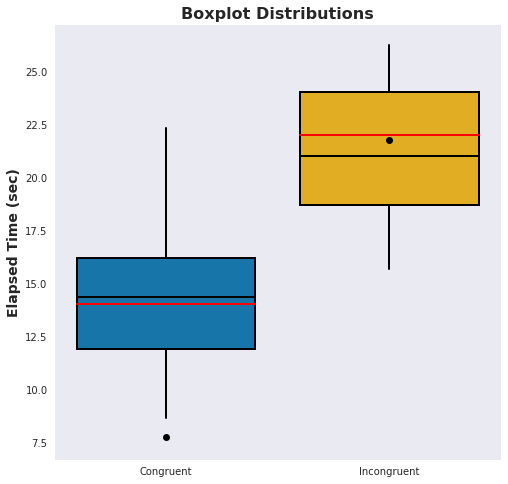

In [2]:
# boxplot for mean, quartiles, and outliers
fig = plt.figure(figsize=(8, 8))
box_palette = {'Congruent': '#007BC2', 'Incongruent': '#FFBB04'}
ax = sns.boxplot(data=df, showfliers=False, color='white', palette=box_palette,
                 **{'meanline': True,
                    'showmeans': True,
                    'showcaps': False,
                    'meanprops':{'linewidth':2, 'linestyle': '-', 'color': 'red'},
                    'medianprops':{'linewidth': 2, 'color': 'black'},
                    'whiskerprops':{'linewidth': 2, 'color':'black'},
                    'boxprops':{'linewidth': 2, 'edgecolor': 'black'}})
# personal data points plotted on top in red
ax = sns.swarmplot(data=personal, color='black', size=7)

# label plot and modify display parameters
plt.title('Boxplot Distributions', fontsize=16, fontweight='bold')
plt.ylabel('Elapsed Time (sec)', fontweight='bold', fontsize=14)
plt.show()

## Boxplot analysis  
  
The boxplot visualizes the spread of the data for both groups very clearly. One can see the total range of the Congruent group is wider than the range of the Incongruent group, excluding outliers. The range of the interquartile ranges are similar for both groups; however, nearly __75%__ of the Congruent group posted a faster time than the fastest time of the Incongruent group.

_My own data points are interesting because one point is an outlier and the other lies very close to the mean._

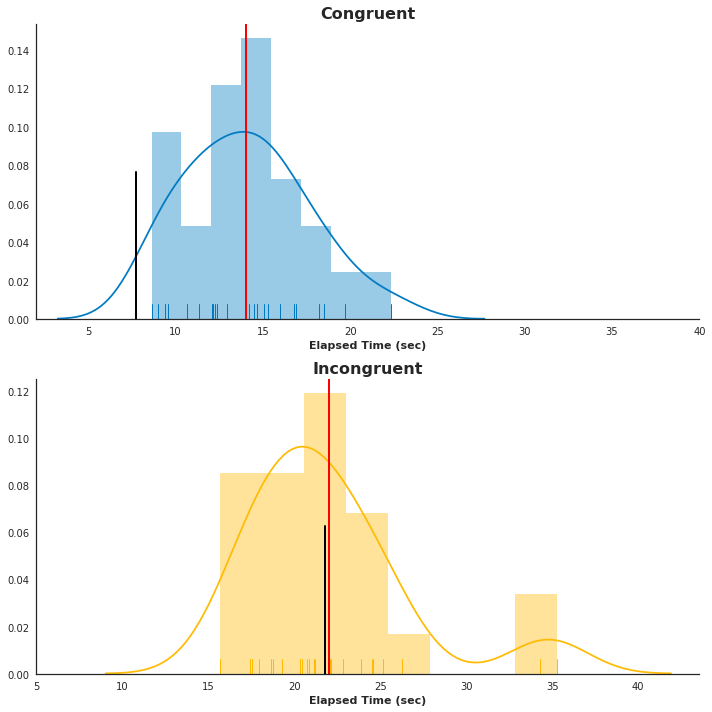

In [3]:
# plot Congruent distribution
with sns.axes_style('white'):
    plt.figure(figsize=(10, 10))
    plt.subplot(211)
    ax = sns.distplot(a=df.Congruent, bins=8, rug=True, color='#007BC2', kde=True)
    # personal data point mixed into the rugplot of histogram
    ax = sns.rugplot(a=personal.Congruent, color='black', height=0.5, linewidth=2)
    plt.axvline(np.mean(df.Congruent), color='red', linewidth=2)

    # label plot and modify display parameters
    plt.title('Congruent', fontweight='bold', fontsize=16)
    plt.xlabel('Elapsed Time (sec)', fontweight='bold')
    plt.xticks(range(5, 41, 5))
    sns.despine()

# plot Incongruent distribution
with sns.axes_style('white'):
    plt.subplot(212)
    ax = sns.distplot(a=df.Incongruent, bins=8, rug=True, color='#FFBB04', kde=True)
    # personal data point mixed into the rugplot of histogram
    ax = sns.rugplot(a=personal.Incongruent, color='black', height=0.5, linewidth=2)
    plt.axvline(np.mean(df.Incongruent), color='red', linewidth=2)

    # label plot and modify display parameters
    plt.title('Incongruent', fontweight='bold', fontsize=16)
    plt.xlabel('Elapsed Time (sec)', fontweight='bold')
    plt.xticks(range(5, 41, 5))
    sns.despine()
    plt.tight_layout()

## Histogram Analysis  
  
By aligning the elapsed time of the two groups, one can quickly observe the shape of distributions are similar. However, the means are not close to each other. In fact, the mean for the Incongruent group, __22.0159__, is near the maximum value of the Congruent group, __22.328__.

# Statistical Testing and Analysis  
  
__(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?__  

## Manual Testing

In [52]:
# Perform the statistical test here
# 1. Calculate the difference in times and sum
stroop = df.copy()
stroop['Difference'] = stroop.Congruent - stroop.Incongruent # D
stroop['Squared_Difference'] = (stroop.Congruent - stroop.Incongruent)**2
diffs_sum = np.sum(stroop.Difference)
diffs_mean = np.mean(stroop.Difference)

# 2. Square differences and sum
stroop['Squared_Difference'] = (stroop.Congruent - stroop.Incongruent)**2
squared_diffs_sum = np.sum(stroop.Squared_Difference)

# 3. Calculate t-statistic
n = stroop.shape[0]
t_score_numerator = diffs_mean 
t_score_denominator = math.sqrt((squared_diffs_sum - (((diffs_sum)**2) / n)) / 
                                ((n-1)*(n)))
t_score = t_score_numerator / t_score_denominator

# 4. Calculate degrees of freedom to lookup in t-table
DF = n - 1

# 5. Find t-critical value from t-table
t_critical_lower, t_critical_higher = -2.069, 2.069

# 6. Compare calculated t-statistic and t-critical value
if t_score < 0:
    print("(t-statistic) {0} < (lower t-critical value) {1} = {2}".format(
            t_score, t_critical_lower, t_score < t_critical_lower))
else:
    print("(t-statistic) {0} > (lower t-critical value) {1} = {2}".format(
            t_score, t_critical_higher, t_score > t_critical_higher))

(t-statistic) -8.020706944109955 < (lower t-critical value) -2.069 = True


## SciPy Equivalent Testing  
  
*For comparison, look at the manually calculated $t$-statistic compared to stats.ttest_rel()$^2$ from the scipy.stats package...*

In [53]:
# SciPy Paired T-test to verify results
print('Manual calculated t-statistic: {0}'.format(t_score))
print('            SciPy t-statistic: {0}'.format(str(stats.ttest_rel(
                                                  df.Congruent, df.Incongruent)[0])))

Manual calculated t-statistic: -8.020706944109955
            SciPy t-statistic: -8.02070694411


## Report  
  
_Walk through paired sample t-test.$^3$_  
__1.__ Calculate the difference in times and sum  
$\begin{aligned}
\\
\quad\sum{D} &= \displaystyle\sum{C_i - I_i}  \\
&= -191.155  \\
\\
\end{aligned}$  
__2.__ Square differences and sum  
$\begin{aligned}
\\
\quad\sum{D^2} &= \displaystyle\sum{(C_i - I_i)^2}  \\
&= 2066.84 \\
\\
\end{aligned}$  
__3.__ Calculate t-statistic  
$\begin{aligned}
\\
\quad\alpha &= 0.05  \\
t_{\alpha} &= \frac{(\sum{D}) / n}{\sqrt{\frac{\sum{D^2} - (\frac{(\sum{D})^2}{n})}{(n - 1)(n)}}}  \\
&= \frac{-191.155 / 24}{\sqrt{\frac{2066.84 - (\frac{(-191.155)^2}{24})}{(24 - 1)(24)}}}  \\
&= \frac{-7.965}{\sqrt{\frac{2066.84 - (\frac{-36540.234}{24})}{552}}}  \\
&= -8.021  \\
\\
\end{aligned}$  
__4.__ Calculate degrees of freedom to lookup in $t$-table  
$\begin{aligned}
\\
\quad DF &= n - 1  \\
&= 24 - 1 \\
&= 23  \\
\\
\end{aligned}$  
__5.__ Find $t$-critical value from [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)$^4$  
$\begin{aligned}
\\
\quad t_{0.05}^{(23)} &= \pm 2.069  \\
\\
\end{aligned}$  
__6.__ Compare calculated $t$-statistic and $t$-critical value  
$\begin{aligned}
\\
\quad -8.021 \lt -2.069
\\
\end{aligned}$  
___Therefore, we can reject the null hypothesis.___$^5$

This matches up with my expectations. My own difficulties in performing the Stroop task during the incongruent condition led me to my hypothesis and expectation. With $\alpha$ = 0.05, we can take confidence in our conclusion due to the small p-value.

I am curious if even one subject was able to perform the tasks with a similar time or even post a faster time for the incongruent condition.  

## Further Exploration  
  
Looking at the slopegraph below, it appears not one sample subject performed the incongruent Stroop task as quickly as the congruent task.  

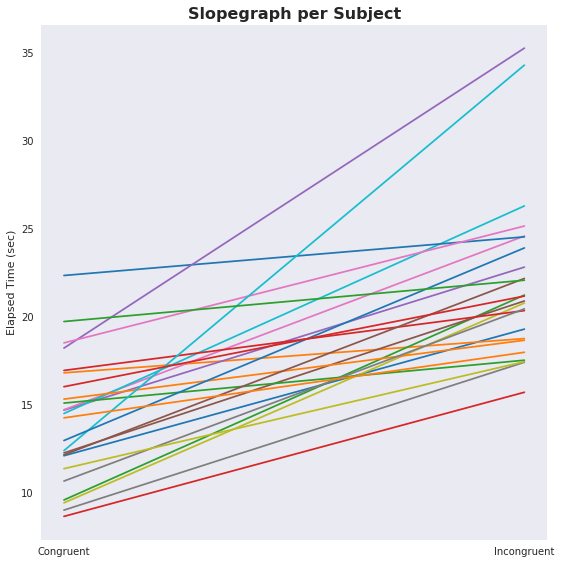

In [49]:
# Slopegraph of each subject
fig = plt.figure(figsize=(8,8))

for row in range(df.shape[0]):
    ax = plt.plot(df.iloc[row])
    
plt.title('Slopegraph per Subject', fontweight='bold', fontsize=16)
plt.ylabel('Elapsed Time (sec)')
sns.despine()
plt.tight_layout()

# Optional

__(6) What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!__

In watching courses on data visualization, multiple sources identified color as a visual encoder which is preprocessed by the brain to categorize data at an unconscious level. This Stroop task requires you to override your natural tendency to read words for content and instead, focus on the encoding of the words. I would imagine one could practice this particular task and learn to overcome the natural tendency. Further studies would be necessary to test that theory.

While researching the Stroop Effect and identifying a Stroop task, I became interested to see the performance of young children with low literacy or even no literacy skills, as well as the performance of non-native English speakers. Neither one of those groups would have to overcome the natural tendency for English speakers and individuals with high literacy skills. I foresee those results differing greatly from the sample analyzed above.

# Sources
## General Use
[LaTeX reference](https://www.sharelatex.com/learn/Main_Page)  
[GitHub Flavored Markdown](https://github.github.com/gfm/)

## Specific Use
$^1$[Paired sample, dependent t-test](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php)  
$^2$[SciPy.stats.ttest rel() reference](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)  
$^3$[Paired T-Test](http://www.statisticshowto.com/probability-and-statistics/t-test/#PairedTTest)  
$^4$[Udacity provided t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)  
$^5$[Paired Sample T-Test Walkthrough](http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/)